In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

def plot_trajectory_with_curvature(trajectory_setpoints, curvature_radius):
    """
    3D轨迹可视化，颜色由曲率半径决定（大=红，小=蓝）
    """
    xyz = np.array(trajectory_setpoints)[:, :3]
    curvature_radius = np.array(curvature_radius).flatten()
    if curvature_radius.size == 1:
        curvature_radius = np.repeat(curvature_radius, xyz.shape[0])
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    p = ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c=curvature_radius, cmap='jet')
    fig.colorbar(p, ax=ax, label='Curvature Radius')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')


    # 手动设置坐标轴范围相等
    xyz_limits = np.array([ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()])
    xyz_center = np.mean(xyz_limits, axis=1)
    xyz_radius = (xyz_limits[:,1] - xyz_limits[:,0]).max() / 2
    ax.set_xlim3d([xyz_center[0] - xyz_radius, xyz_center[0] + xyz_radius])
    ax.set_ylim3d([xyz_center[1] - xyz_radius, xyz_center[1] + xyz_radius])
    ax.set_zlim3d([xyz_center[2] - xyz_radius, xyz_center[2] + xyz_radius])

    # 俯视视角
    ax.view_init(elev=90, azim=90)

    plt.title('Trajectory colored by Curvature Radius')
    plt.show()


def normalize_curvature_radius(curvature_radius):
    """
    将曲率半径归一化到[0, 1]区间
    """
    curvature_radius = np.array(curvature_radius).flatten()
    min_val = np.min(curvature_radius)
    max_val = np.max(curvature_radius)
    if max_val - min_val < 1e-8:
        # 所有值都一样，直接返回全0
        return np.zeros_like(curvature_radius)
    return (curvature_radius - min_val) / (max_val - min_val)

## **无重采样  = Speed Limit 大**

Flying Time =  30.000000000000004
Delta_t: 0.16666666666666669


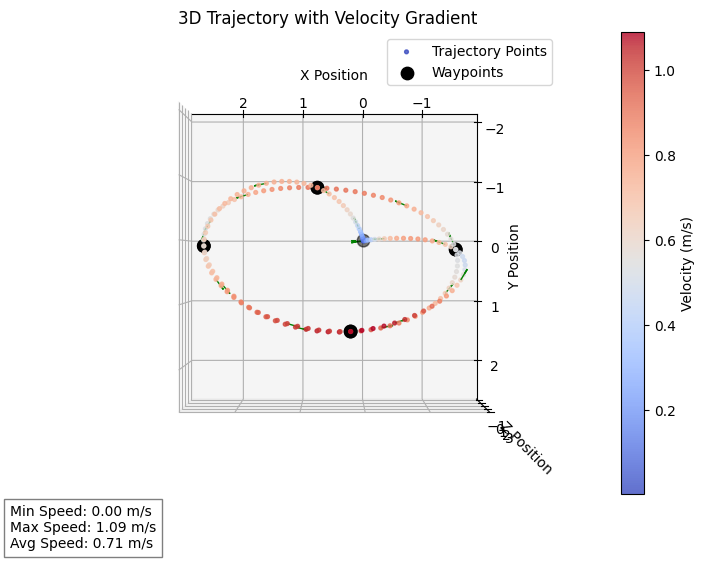

In [2]:
import os
import sys

# 将上一级目录添加到 sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import tools
import pandas as pd


cm = 0.01
HOVER_HEIGHT  = 60*cm  
Trajectory = tools.Trajectory_Class('../../position_records.csv')

from planning import MotionPlanner3D
Planner = MotionPlanner3D(Gate_points = Trajectory.point_list,
                          time_gain   = 3.0, #FF0000
                          speed_limit = 4.0
                          )



print("Flying Time = ", Planner.time_setpoints[-1])
Planner.plot_discrete(None, Planner.waypoints, Planner.trajectory_setpoints)



## **有重采样 = Speed Limit 小**

Flying Time =  18.8
Delta_t: 0.1


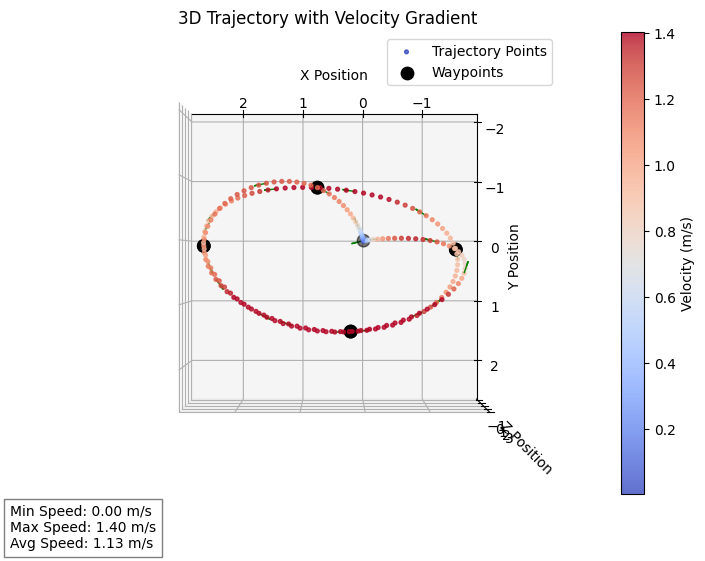

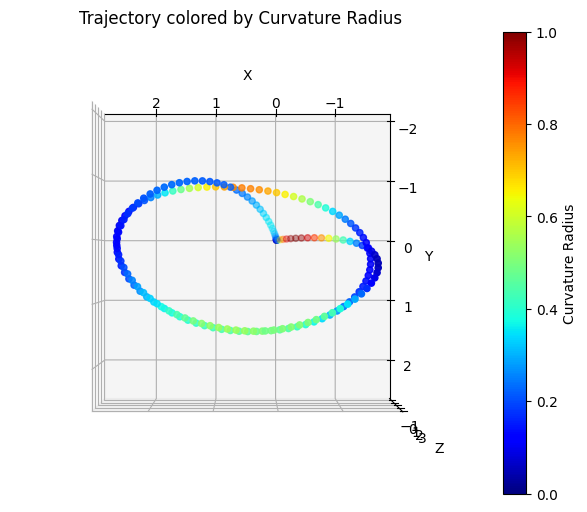

In [3]:
import os
import sys

# 将上一级目录添加到 sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import tools
import pandas as pd
from planning import MotionPlanner3D


cm = 0.01
HOVER_HEIGHT  = 60*cm  
Trajectory = tools.Trajectory_Class('../../position_records.csv')

Planner = MotionPlanner3D(Gate_points = Trajectory.point_list,
                               time_gain   = 1.8,
                               speed_limit = 1.4,)

print("Flying Time = ", Planner.time_setpoints[-1])
# print(len(Planner.trajectory_setpoints))
Planner.plot_discrete(None, Planner.waypoints, Planner.trajectory_setpoints)

# import matplotlib.pyplot as plt
# plt.plot(Planner.compute_curvature_radius())

plot_trajectory_with_curvature(Planner.trajectory_setpoints,
                               normalize_curvature_radius(Planner.compute_curvature_radius()))

# **Debug**

Total flying time:  14.01111111111111
Max velocity:  None m/s
Max Velocity:  2.090129829492432 m/s


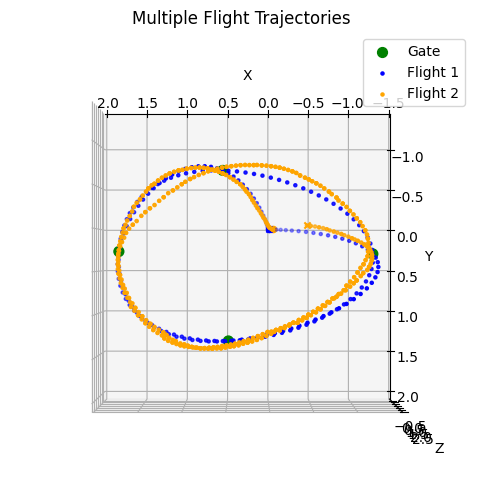

In [22]:
import os
import sys
import numpy as np
import pandas as pd

# 将上一级目录添加到 sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
import tools
import PLOT

from planning import MotionPlanner3D

cm = 0.01
HOVER_HEIGHT  = 60*cm  
Trajectory = tools.Trajectory_Class('../../position_records.csv')
Planner = MotionPlanner3D(Gate_points = Trajectory.return_gate_points_list(), 
                          time_gain   = 1.3, 
                          speed_limit = 1.4)

print("Total flying time: ",Planner.time_setpoints[-1])
print("Max velocity: ",Planner.result_traj_vel_max, "m/s")
print("Max Velocity: ",np.max(np.linalg.norm(Planner.trajectory_velocities, axis=1)), "m/s")

data_real = PLOT.get_real_pos_list("../../flight_log.csv")
PLOT.plot_multiple_flight_logs( 
                                [
                                Planner.trajectory_setpoints,
                                data_real,],
                                np.array(Planner.Gate_points),
                                type='discrete')

# Planner.trajectory_setpoints[10]
# Planner.trajectory_velocities[10]

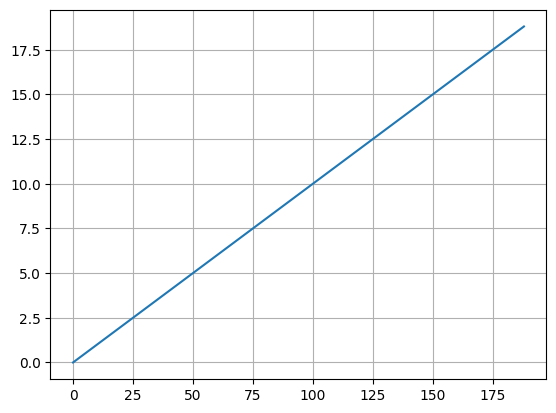

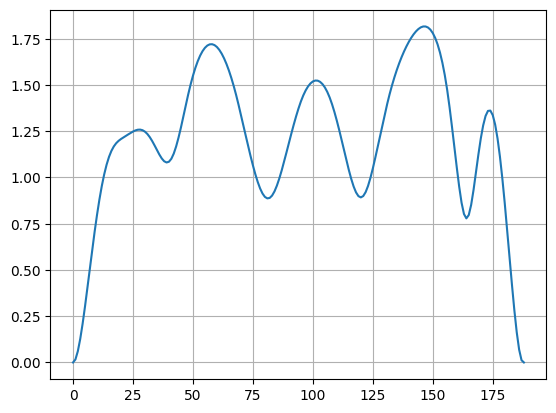

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure
plt.plot(Planner.time_setpoints)
plt.grid()
plt.show()

plt.Figure
plt.plot(np.linalg.norm(Planner.trajectory_velocities, axis=1))
plt.grid()